# 多项式回归实现与应用
在线性回归中，我们通过建立自变量x的一次方程来拟合数据。
而非线性回归中，则需要建立因变量和自变量之间的非线性关系。
从直观上讲，也就是拟合的直线变成了「曲线」。
对于非线性回归问题而言，最简单也是最常见的方法就是本次实验要讲解的「多项式回归」。

## 多项式回归基础

In [2]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]

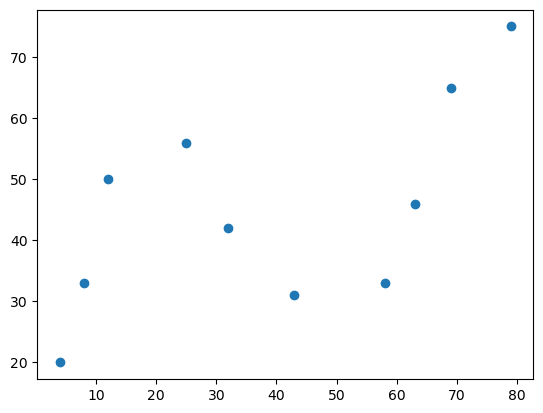

In [3]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(x, y)

### 实现 2 次多项式拟合
接下来，通过多项式来拟合上面的散点数据。首先，一个标准的一元高阶多项式函数如下所示：
$$
y(x, w) = w_0 + w_1x + w_2x^2 + \ldots + w_mx^m = \sum_{j=0}^{m} w_jx^j
$$
其中，$m$表示多项式的阶数，$x^j$表示$x$的$j$次方，$w$表示该多项式的系数。
如果通过手动指定多项式阶数$w$的大小，那么就只需要确定多项式系数$m$的值是多少。例如，这里首先指定 $m=2$，多项式就变成了：
$$
y(x, w) = w_0 + w_1x + w_2x^2 = \sum_{j=0}^2 w_jx^j
$$
首先，我们构造两个函数，分别是用于拟合的多项式函数，以及误差函数。

In [4]:
def func(p, x):
    # 根据公式，定义 2 次多项式函数
    w0, w1, w2 = p
    f = w0 + w1 * x + w2 * x * x
    return f


def err_func(p, x, y):
    # 残差函数（观测值与拟合值之间的差距）
    ret = func(p, x) - y
    return ret

In [5]:
import numpy as np
from scipy.optimize import leastsq

p_init = np.random.randn(3)  # 生成 3 个随机数
# 使用 Scipy 提供的最小二乘法函数得到最佳拟合参数
parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))

print("Fitting Parameters: ", parameters[0])

Fitting Parameters:  [ 3.76893111e+01 -2.60474101e-01  8.00078027e-03]


然后，我们尝试绘制出拟合后的图像
$$
y(x) = 37-0.26x+0.0080x^2
$$

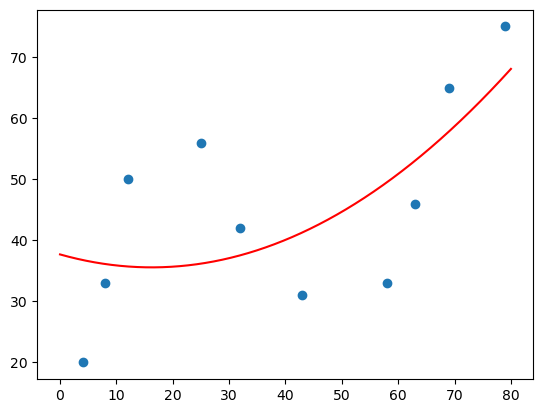

In [6]:
# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制拟合函数曲线
plt.plot(x_temp, func(parameters[0], x_temp), "r")

# 绘制原数据点
plt.scatter(x, y)

### 实现N次多项式拟合
上面采用 2 次多项式拟合的结果也不能恰当地反映散点的变化趋势。此时，我们可以尝试 3 次及更高次多项式拟合。接下来的代码中，我们将针对上面 2 次多项式拟合的代码稍作修改，实现一个 N 次多项式拟合的方法。

In [8]:
def fit_func(p, x):
    """根据公式，定义 n 次多项式函数"""
    f = np.poly1d(p)
    return f(x)


def err_func(p, x, y):
    """残差函数（观测值与拟合值之间的差距）"""
    ret = fit_func(p, x) - y
    return ret


def n_poly(n):
    """n 次多项式拟合"""
    p_init = np.random.randn(n)  # 生成 n 个随机数
    parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))
    return parameters[0]

可以用$n=3$（二次多项式）来验证一下上面的代码

In [9]:
n_poly(3)

array([ 8.00077967e-03, -2.60474050e-01,  3.76893105e+01])

接下来，我们绘制出 3，4，5，6，7, 8 次多项式的拟合结果

Text(0.5, 1.0, 'm = 8')

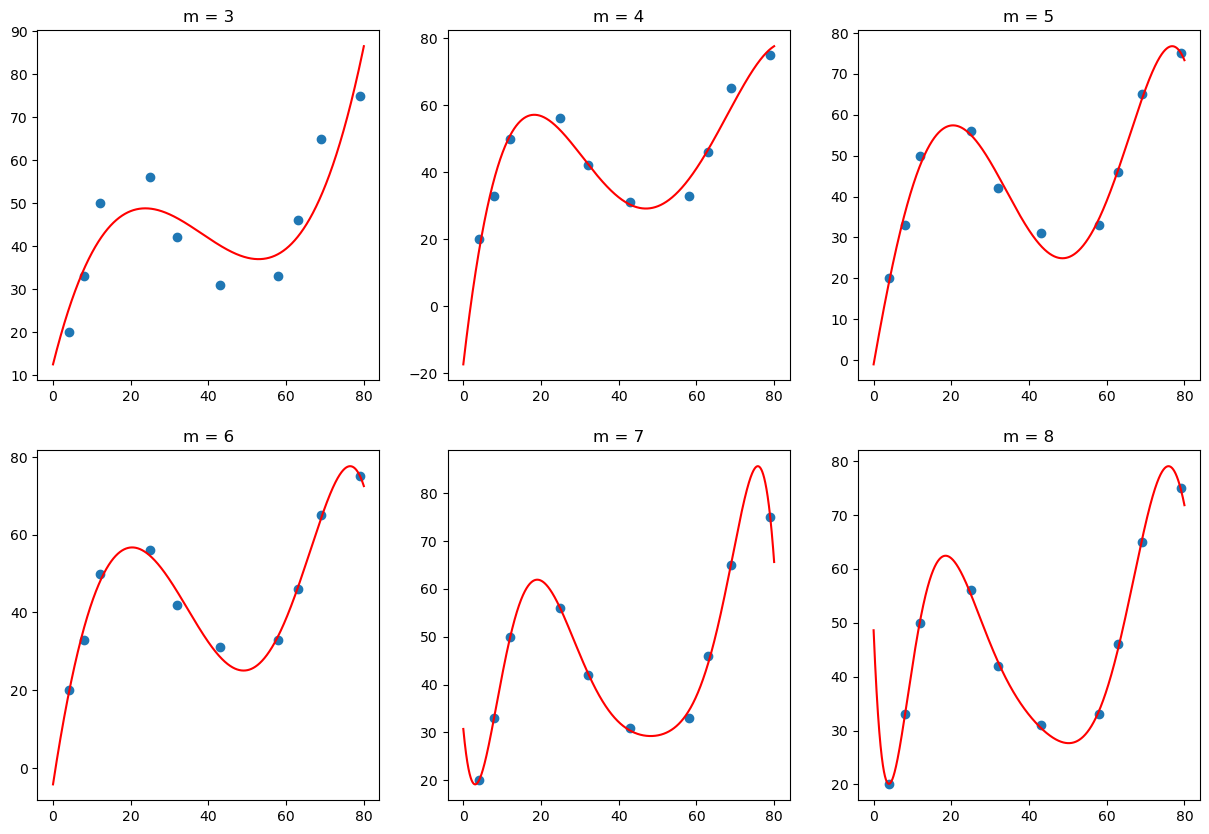

In [10]:
# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制子图
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].plot(x_temp, fit_func(n_poly(4), x_temp), "r")
axes[0, 0].scatter(x, y)
axes[0, 0].set_title("m = 3")

axes[0, 1].plot(x_temp, fit_func(n_poly(5), x_temp), "r")
axes[0, 1].scatter(x, y)
axes[0, 1].set_title("m = 4")

axes[0, 2].plot(x_temp, fit_func(n_poly(6), x_temp), "r")
axes[0, 2].scatter(x, y)
axes[0, 2].set_title("m = 5")

axes[1, 0].plot(x_temp, fit_func(n_poly(7), x_temp), "r")
axes[1, 0].scatter(x, y)
axes[1, 0].set_title("m = 6")

axes[1, 1].plot(x_temp, fit_func(n_poly(8), x_temp), "r")
axes[1, 1].scatter(x, y)
axes[1, 1].set_title("m = 7")

axes[1, 2].plot(x_temp, fit_func(n_poly(9), x_temp), "r")
axes[1, 2].scatter(x, y)
axes[1, 2].set_title("m = 8")

当$m=4$（四次多项式）时，拟合的效果已经明显优于$m=3$的结果。但是当$m=8$时，曲线呈现出明显的震荡(即过拟合现象)

### 使用 scikit-learn 进行多项式拟合
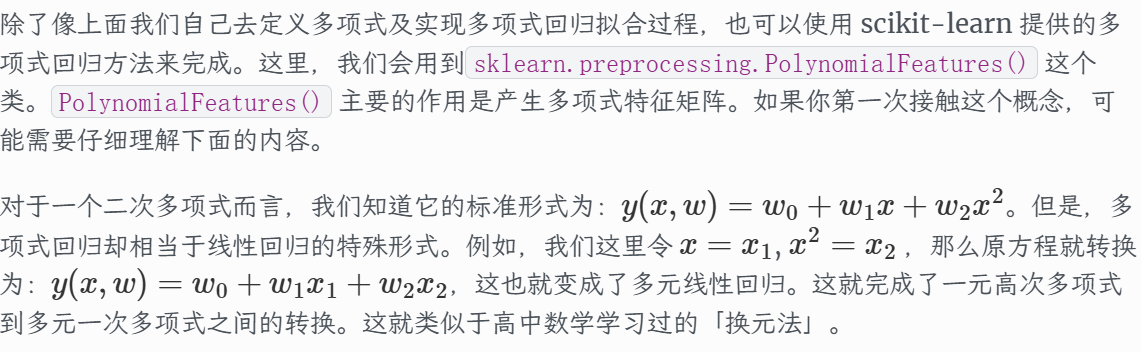

举例说明，对于自变量向量$X$和因变量$y$ ，如果 $X$:
$$\mathbf{X} = \begin{bmatrix}
2 \\
-1 \\
3
\end{bmatrix}$$
我们可以通过$y = w_1x + w_0$线性回归模型进行拟合。同样，如果对于一元二次多项式，我们可以通过$y(x,w) = w_2x^2 + w_1x + w_0$进行拟合。如果能得到由$x =x_1,x^2 = x_2$构成的特征矩阵，即:
$$
\mathbf{X} = \begin{bmatrix}
X,X^2
\end{bmatrix} = \begin{bmatrix}
2 & 4 \\
-1 & 1 \\
3 & 9
\end{bmatrix}
$$
那么也就可以通过线性回归进行拟合了
在 scikit-learn 中，我们可以通过 PolynomialFeatures() 类自动产生多项式特征矩阵，PolynomialFeatures() 类的默认参数及常用参数定义如下：

```python
sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
```
- degree: 多项式次数，默认为 2 次多项式
- interaction_only: 默认为 False，如果为 True 则产生相互影响的特征集。
- include_bias: 默认为 True，包含多项式中的截距项。

In [12]:
from sklearn.preprocessing import PolynomialFeatures

X = [2, -1, 3]
X_reshape = np.array(X).reshape(len(X), 1)  # 转换为列向量
# 使用 PolynomialFeatures 自动生成特征矩阵
PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_reshape)

array([[ 2.,  4.],
       [-1.,  1.],
       [ 3.,  9.]])

前面小节中的示例数据，其自变量应该是$x$，而因变量是$y$。如果我们使用 2 次多项式拟合，那么首先使用 PolynomialFeatures() 得到特征矩阵。

In [13]:
x = np.array(x).reshape(len(x), 1)  # 转换为列向量
y = np.array(y).reshape(len(y), 1)

# 使用 sklearn 得到 2 次多项式回归特征矩阵
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_x = poly_features.fit_transform(x)

poly_x

array([[4.000e+00, 1.600e+01],
       [8.000e+00, 6.400e+01],
       [1.200e+01, 1.440e+02],
       [2.500e+01, 6.250e+02],
       [3.200e+01, 1.024e+03],
       [4.300e+01, 1.849e+03],
       [5.800e+01, 3.364e+03],
       [6.300e+01, 3.969e+03],
       [6.900e+01, 4.761e+03],
       [7.900e+01, 6.241e+03]])

然后，我们使用 scikit-learn 训练线性回归模型。

In [14]:
from sklearn.linear_model import LinearRegression

# 定义线性回归模型
model = LinearRegression()
model.fit(poly_x, y)  # 训练

# 得到模型拟合参数
model.intercept_, model.coef_

(array([37.68931083]), array([[-0.26047408,  0.00800078]]))

你会发现，这里得到的参数值和前面的公式一致。为了更加直观，这里同样绘制出拟合后的图像。（图和前面其实是一样的）

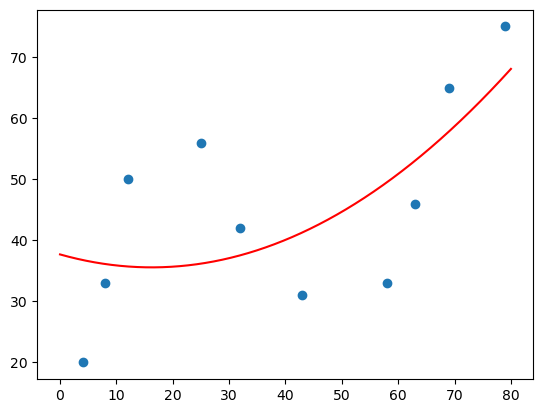

In [15]:
# 绘制拟合图像
x_temp = np.array(x_temp).reshape(len(x_temp), 1)
poly_x_temp = poly_features.fit_transform(x_temp)

plt.plot(x_temp, model.predict(poly_x_temp), "r")
plt.scatter(x, y)

## 多项式回归预测
上面的内容中，我们了解了如何使用多项式去拟合数据。那么在接下来的内容中，就使用多项式回归去解决实际的预测问题。本次预测实验中，我们使用到由世界卫生组织和联合国儿童基金会提供的「世界麻疹疫苗接种率」数据集。而目标则是预测相应年份的麻疹疫苗接种率。

首先，我们导入并预览「世界麻疹疫苗接种率」数据集。

In [19]:
import pandas as pd
import requests
from io import StringIO

url = "https://cdn.aibydoing.com/aibydoing/files/course-6-vaccine.csv"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# 优化后的完整流程
try:
    # 步骤1：获取数据
    response = requests.get(url, headers=headers, timeout=10)
    response.raise_for_status()  # 自动触发HTTP错误异常
    
    # 步骤2：内存加载（关键修正点）
    csv_data = StringIO(response.text)
    df = pd.read_csv(csv_data)
    
    # 步骤3：数据验证
    print("数据集维度:", df.shape)
    print("\n前5行数据预览:")
    print(df.head())
    print("\n数据类型统计:")
    print(df.dtypes)
    
except requests.exceptions.RequestException as e:
    print(f"网络请求失败: {str(e)}")
except pd.errors.ParserError as e:
    print(f"CSV解析错误: {str(e)}")
except Exception as e:
    print(f"未知错误: {str(e)}")


数据集维度: (34, 2)

前5行数据预览:
   Year     Values
0  1983  48.676809
1  1984  50.653151
2  1985  45.603729
3  1986  45.511160
4  1987  52.882892

数据类型统计:
Year        int64
Values    float64
dtype: object


可以看出，该数据集由两列组成。其中 Year 表示年份，而 Values 则表示当年世界麻疹疫苗接种率，这里只取百分比的数值部分。我们将数据绘制成图表，查看变化趋势。

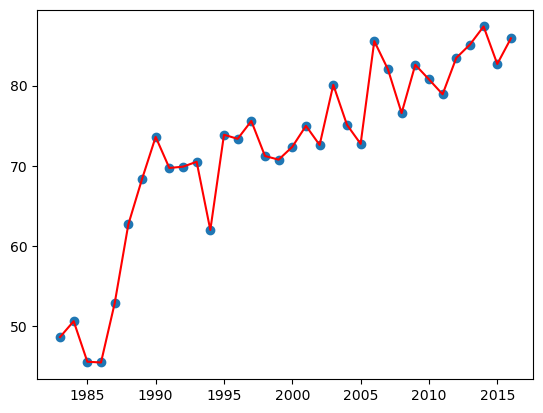

In [20]:
# 定义 x, y 的取值
x = df["Year"]
y = df["Values"]
# 绘图
plt.plot(x, y, "r")
plt.scatter(x, y)

对于上图呈现出来的变化趋势，我们可能会认为多项式回归会优于线性回归。到底是不是这样呢？试一试便知

## 线性回归与 2 次多项式回归对比
根据线性回归课程中学到的内容，在机器学习任务中，我们一般会将数据集划分为训练集和测试集。所以，这里将 70% 的数据划分为训练集，而另外 30% 则归为测试集。代码如下：

In [21]:
# 首先划分 dateframe 为训练集和测试集
train_df = df[: int(len(df) * 0.7)]
test_df = df[int(len(df) * 0.7) :]

# 定义训练和测试使用的自变量和因变量
X_train = train_df["Year"].values
y_train = train_df["Values"].values

X_test = test_df["Year"].values
y_test = test_df["Values"].values

首先，训练线性回归模型，并进行预测

In [22]:
# 建立线性回归模型
model = LinearRegression()
model.fit(X_train.reshape(len(X_train), 1), y_train.reshape(len(y_train), 1))
results = model.predict(X_test.reshape(len(X_test), 1))
results  # 线性回归模型在测试集上的预测结果

array([[81.83437635],
       [83.09935437],
       [84.36433239],
       [85.62931041],
       [86.89428843],
       [88.15926645],
       [89.42424447],
       [90.68922249],
       [91.95420051],
       [93.21917853],
       [94.48415655]])

这里，我们直接使用 scikit-learn 提供的 MAE 和 MSE 计算方法

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("线性回归平均绝对误差：", mean_absolute_error(y_test, results.flatten()))
print("线性回归均方误差：", mean_squared_error(y_test, results.flatten()))

线性回归平均绝对误差： 6.011979515629812
线性回归均方误差： 43.531858295153434


接下来，开始训练 2 次多项式回归模型，并进行预测

In [25]:
# 2 次多项式回归特征矩阵
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_X_train_2 = poly_features_2.fit_transform(X_train.reshape(len(X_train), 1))
poly_X_test_2 = poly_features_2.fit_transform(X_test.reshape(len(X_test), 1))

# 2 次多项式回归模型训练与预测
model = LinearRegression()
model.fit(poly_X_train_2, y_train.reshape(len(X_train), 1))  # 训练模型

results_2 = model.predict(poly_X_test_2)  # 预测结果

results_2.flatten()  # 打印扁平化后的预测结果

print("2 次多项式回归平均绝对误差：", mean_absolute_error(y_test, results_2.flatten()))
print("2 次多项式均方误差：", mean_squared_error(y_test, results_2.flatten()))

2 次多项式回归平均绝对误差： 19.792070829636444
2 次多项式均方误差： 464.329038477939


根据上面平均绝对误差和均方误差的定义，你已经知道这两个取值越小，代表模型的预测准确度越高。也就是说，线性回归模型的预测结果要优于 2 次多项式回归模型的预测结果

## 更高次多项式回归预测
不必惊讶，这种情况是非常常见的。但这并不代表，这节实验中所讲的多项式回归就会比线性回归更差。下面，我们就试一试 3，4，5 次多项式回归的结果。为了缩减代码量，我们重构代码，并一次性得到 3 个实验的预测结果。

这里将通过实例化 make_pipeline 管道类，实现调用一次 fit 和 predict 方法即可应用于所有预测器。make_pipeline 是使用 sklearn 过程中的技巧创新，其可以将一个处理流程封装起来使用。

具体来讲，例如上面的多项式回归中，我们需要先使用 PolynomialFeatures 完成特征矩阵转换，再放入 LinearRegression 中。那么，PolynomialFeatures + LinearRegression 这一个处理流程，就可以通过 make_pipeline 封装起来使用。

In [26]:
from sklearn.pipeline import make_pipeline

X_train = X_train.reshape(len(X_train), 1)
X_test = X_test.reshape(len(X_test), 1)
y_train = y_train.reshape(len(y_train), 1)

for m in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)
    pre_y = model.predict(X_test)
    print("{} 次多项式回归平均绝对误差：".format(m), mean_absolute_error(y_test, pre_y.flatten()))
    print("{} 次多项式均方误差：".format(m), mean_squared_error(y_test, pre_y.flatten()))
    print("---")

3 次多项式回归平均绝对误差： 4.54769199918205
3 次多项式均方误差： 29.93305718556485
---
4 次多项式回归平均绝对误差： 4.425483985527088
4 次多项式均方误差： 29.04084397341635
---
5 次多项式回归平均绝对误差： 4.341616123002793
5 次多项式均方误差： 28.22192518318592
---


从上面的结果可以得出，3，4，5 次多项式回归的结果均优于线性回归模型。所以，多项式回归还是有其优越性的

## 多项式回归预测次数选择
在选择多项式进行回归预测的过程中，到底几次多项式是最优呢？

对于上面的问题，其实答案很简单。我们可以选择一个误差指标，例如这里选择 MSE，然后计算出该指标随多项式次数增加而变化的图像，结果不就一目了然了吗？试一试。

MSE 计算结果： [43.531858295153434, 464.329038477939, 29.93305718556485, 29.04084397341635, 28.22192518318592, 27.440821610589747, 26.712320047854302, 26.0387296465142, 25.422418052682243, 24.865818430725316]


Text(0, 0.5, 'MSE')

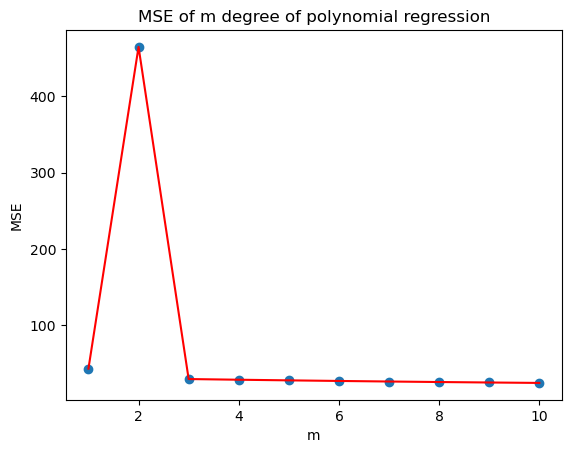

In [27]:
# 计算 m 次多项式回归预测结果的 MSE 评价指标并绘图
mse = []  # 用于存储各最高次多项式 MSE 值
m = 1  # 初始 m 值
m_max = 10  # 设定最高次数
while m <= m_max:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)  # 训练模型
    pre_y = model.predict(X_test)  # 测试模型
    mse.append(mean_squared_error(y_test, pre_y.flatten()))  # 计算 MSE
    m = m + 1

print("MSE 计算结果：", mse)
# 绘图
plt.plot([i for i in range(1, m_max + 1)], mse, "r")
plt.scatter([i for i in range(1, m_max + 1)], mse)

# 绘制图名称等
plt.title("MSE of m degree of polynomial regression")
plt.xlabel("m")
plt.ylabel("MSE")

如上图所示，MSE 值在 2 次多项式回归预测时达到最高点，之后迅速下降。而 3 次之后的结果虽然依旧呈现逐步下降的趋势，但趋于平稳。一般情况下，我们考虑到模型的泛化能力，避免出现过拟合，这里就可以选择 3 次多项式为最优回归预测模型。